In [63]:
import pandas as pd
import numpy as np
import json

In [30]:
csv_file_path=r"unprocessed_iris_dataset.csv"
df= pd.read_csv(csv_file_path)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             195 non-null    int64  
 1   SepalLengthCm  193 non-null    float64
 2   SepalWidthCm   195 non-null    float64
 3   PetalLengthCm  195 non-null    float64
 4   PetalWidthCm   191 non-null    float64
 5   Species        192 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 9.3+ KB


In [32]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,195.000000,193.000000,195.000000,195.000000,191.000000
mean,152.128205,10.974093,3.038974,19.082564,1.191623
std,259.777659,71.569675,0.476152,122.943150,0.768959
min,1.000000,0.000000,0.000000,0.000000,0.100000
25%,40.500000,5.100000,2.800000,1.600000,0.300000
50%,81.000000,5.800000,3.000000,4.400000,1.300000
75%,124.500000,6.500000,3.300000,5.100000,1.800000
max,1015.000000,1000.000000,4.400000,1000.000000,2.500000


In [33]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1000.0,0.2,Iris-setosa


In [34]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [35]:
def print_duplicated_index(df):
    
    # 找到重複的索引
    duplicated_indices = df.index[df.duplicated()].unique()

    if len(duplicated_indices) > 0:
        print("Duplicated indices found:")
        for idx in duplicated_indices:
            print(f"\nIndex: {idx}")
            print(df.loc[idx])
    else:
        print("No duplicated indices found.")
print_duplicated_index(df)

Duplicated indices found:

Index: 150
Id                            74
SepalLengthCm                6.1
SepalWidthCm                 2.8
PetalLengthCm                4.7
PetalWidthCm                 1.2
Species          Iris-versicolor
Name: 150, dtype: object

Index: 152
Id                          119
SepalLengthCm               7.7
SepalWidthCm                2.6
PetalLengthCm               6.9
PetalWidthCm                2.3
Species          Iris-virginica
Name: 152, dtype: object

Index: 153
Id                            79
SepalLengthCm                6.0
SepalWidthCm                 2.9
PetalLengthCm                4.5
PetalWidthCm                 1.5
Species          Iris-versicolor
Name: 153, dtype: object

Index: 154
Id                            77
SepalLengthCm                6.8
SepalWidthCm                 2.8
PetalLengthCm                4.8
PetalWidthCm                 1.4
Species          Iris-versicolor
Name: 154, dtype: object

Index: 155
Id                        32

In [45]:
distinct_df=df.copy()
distinct_df=distinct_df.drop_duplicates()
distinct_df=distinct_df.reset_index(drop=True)

distinct_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1000.0,0.2,Iris-setosa
...,...,...,...,...,...,...
162,1011,6.5,3.2,5.1,NaN,Iris-virginica
163,1012,4.8,3.0,1.4,0.1,Iris-setosa
164,1013,5.5,3.5,1.3,0.2,NaN
165,1014,4.9,3.1,1.5,0.1,Iris-setosa


In [46]:
distinct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             167 non-null    int64  
 1   SepalLengthCm  165 non-null    float64
 2   SepalWidthCm   167 non-null    float64
 3   PetalLengthCm  167 non-null    float64
 4   PetalWidthCm   163 non-null    float64
 5   Species        164 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


In [47]:
distinct_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,167.000000,165.000000,167.000000,167.000000,163.000000
mean,164.670659,11.824242,3.040120,21.629341,1.176687
std,278.290661,77.405482,0.494312,132.734905,0.762757
min,1.000000,0.000000,0.000000,0.000000,0.100000
25%,41.500000,5.100000,2.800000,1.550000,0.300000
50%,84.000000,5.800000,3.000000,4.400000,1.300000
75%,124.500000,6.400000,3.300000,5.100000,1.800000
max,1015.000000,1000.000000,4.400000,1000.000000,2.500000


In [48]:
print('SepalLengthCm為空值的ＩＤ：')
SepalLengthCmNull=pd.isnull(distinct_df['SepalLengthCm'])
SepalLengthCmNull=pd.Series(SepalLengthCmNull)
for i in range(len(SepalLengthCmNull)):
  if SepalLengthCmNull[i]:
    print(i+1)

print('SepalWidthCm為空值的ＩＤ：')
SepalWidthCmNull=pd.isnull(distinct_df['SepalWidthCm'])
SepalWidthCmNull=pd.Series(SepalWidthCmNull)
for i in range(len(SepalWidthCmNull)):
  if SepalWidthCmNull[i]:
    print(i+1)
  
print('PetalLengthCm為空值的ＩＤ：')
PetalLengthCmNull=pd.isnull(distinct_df['PetalLengthCm'])
PetalLengthCmNull=pd.Series(PetalLengthCmNull)
for i in range(len(PetalLengthCmNull)):
  if PetalLengthCmNull[i]:
    print(i+1)


print('PetalWidthCm為空值的ＩＤ：')
PetalWidthCmNull=pd.isnull(distinct_df['PetalWidthCm'])
PetalWidthCmNull=pd.Series(PetalWidthCmNull)
for i in range(len(PetalWidthCmNull)):
  if PetalWidthCmNull[i]:
    print(i+1)

SepalLengthCm為空值的ＩＤ：
162
167
SepalWidthCm為空值的ＩＤ：
PetalLengthCm為空值的ＩＤ：
PetalWidthCm為空值的ＩＤ：
155
158
161
163


In [49]:

no_Null_df=distinct_df.copy()
for i in no_Null_df.columns:
    print(f'\n{i}為空值的ＩＤ：')
    Null_S=pd.isnull(no_Null_df[i])
    Null_S=pd.Series(Null_S)
    for i in range(len(Null_S)):
      if Null_S[i]:
        print(i+1,end=",")


Id為空值的ＩＤ：

SepalLengthCm為空值的ＩＤ：
162,167,
SepalWidthCm為空值的ＩＤ：

PetalLengthCm為空值的ＩＤ：

PetalWidthCm為空值的ＩＤ：
155,158,161,163,
Species為空值的ＩＤ：
156,159,165,

In [50]:
i = no_Null_df[no_Null_df["Species"].isna()].index
no_Null_df=no_Null_df.drop(i,axis=0)
no_Null_df=no_Null_df.reset_index(drop=True)

In [43]:

SepalLengthCm_mean=np.mean(no_Null_df['SepalLengthCm'])
SepalWidthCm_mean=np.mean(no_Null_df['SepalWidthCm'])
PetalLengthCm_mean=np.mean(no_Null_df['PetalLengthCm'])
PetalWidthCm_mean=np.mean(no_Null_df['PetalWidthCm'])
no_Null_df['SepalLengthCm']=no_Null_df['SepalLengthCm'].fillna(SepalLengthCm_mean)
no_Null_df['SepalWidthCm']=no_Null_df['SepalWidthCm'].fillna(SepalWidthCm_mean)
no_Null_df['PetalLengthCm']=no_Null_df['PetalLengthCm'].fillna(PetalLengthCm_mean)
no_Null_df['PetalWidthCm']=no_Null_df['PetalWidthCm'].fillna(PetalWidthCm_mean)



In [51]:
for i in no_Null_df.columns[1:5]:
    no_Null_df[i]=no_Null_df[i].fillna(np.mean(no_Null_df[i])) 

In [52]:
no_Null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             164 non-null    int64  
 1   SepalLengthCm  164 non-null    float64
 2   SepalWidthCm   164 non-null    float64
 3   PetalLengthCm  164 non-null    float64
 4   PetalWidthCm   164 non-null    float64
 5   Species        164 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.8+ KB


In [53]:
no_Null_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,149.243902,11.937654,3.039024,21.967683,1.180000
std,256.011170,77.638026,0.497295,133.926763,0.756063
min,1.000000,0.000000,0.000000,0.000000,0.100000
25%,40.750000,5.100000,2.800000,1.575000,0.300000
50%,82.500000,5.800000,3.000000,4.400000,1.300000
75%,122.250000,6.500000,3.300000,5.100000,1.800000
max,1015.000000,1000.000000,4.400000,1000.000000,2.500000


SepalLengthCm: Lower Bound = 2.71, Upper Bound = 11.94
SepalWidthCm: Lower Bound = 2.13, Upper Bound = 4.14
PetalLengthCm: Lower Bound = 1.06, Upper Bound = 1000.00
PetalWidthCm: Lower Bound = 0.10, Upper Bound = 2.50


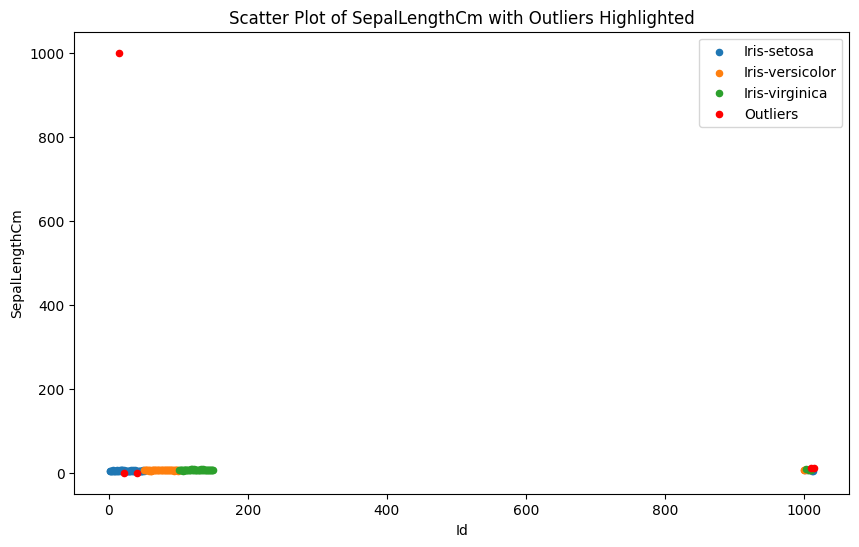

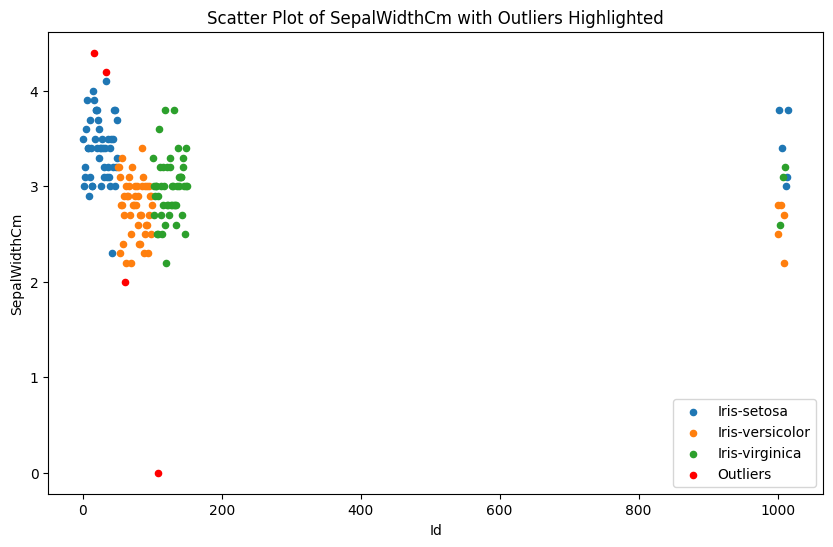

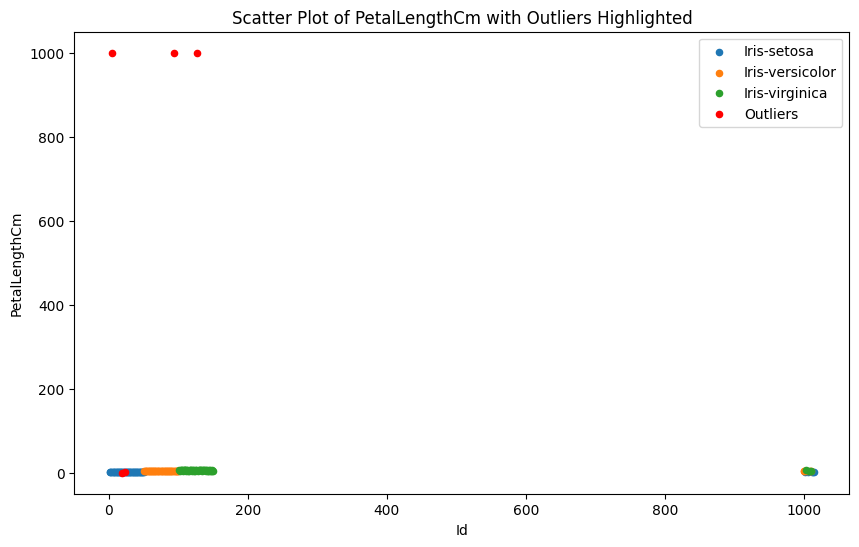

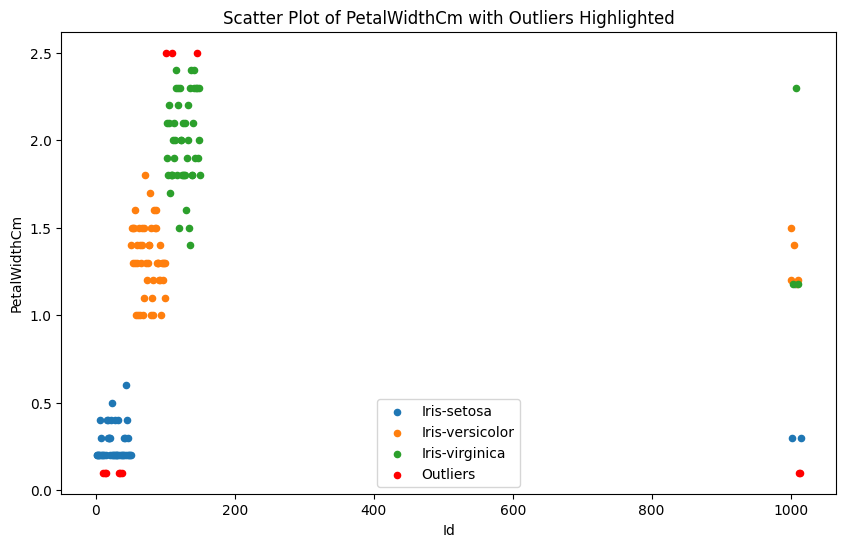

In [54]:
def plot_outliers_with_species_dynamic_colors(df, id_col, group_col, lower_percentile=0.01, upper_percentile=0.99):
    """
    使用 Pandas 繪製散佈圖，動態生成分群顏色，並標示極端值，圖例顯示欄位實際值。
    
    :param df: pandas.DataFrame，包含數據的資料框
    :param id_col: str，作為 X 軸的欄位名稱（如 ID）
    :param group_col: str，作為分群的欄位名稱（如 Species）
    :param lower_percentile: float，極端值的下百分比閾值
    :param upper_percentile: float，極端值的上百分比閾值
    """
    # 動態生成顏色映射
    unique_groups = df[group_col].unique()
    group_colors = {group: f"C{i}" for i, group in enumerate(unique_groups)}  # 使用 Pandas 支援的 C0, C1,... 顏色

    numeric_columns = df.select_dtypes(include='number').columns.drop(id_col)  # 選取數值型欄位，排除 ID

    for col in numeric_columns:
        # 計算百分位範圍
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)

        # 檢測極端值
        df['Outlier'] = (df[col] <= lower_bound) | (df[col] >= upper_bound)

        # 初始化圖表
        ax = None
        
        # 按分群繪製非極端值
        for group in unique_groups:
            group_data = df[(df[group_col] == group) & (~df['Outlier'])]
            ax = group_data.plot.scatter(
                x=id_col,
                y=col,
                color=group_colors[group],  # 動態顏色
                label=group,  # 圖例顯示實際群組名稱
                figsize=(10, 6),
                ax=ax,
                title=f"Scatter Plot of {col} with Outliers Highlighted"
            )
        
        # 繪製極端值
        outliers = df[df['Outlier']]
        outliers.plot.scatter(
            x=id_col,
            y=col,
            color='red',
            label='Outliers',  # 極端值的圖例
            ax=ax
        )

        # 打印上下界資訊
        print(f"{col}: Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

        # 清理臨時欄位
        df.drop(columns=['Outlier'], inplace=True)

plot_outliers_with_species_dynamic_colors(no_Null_df, id_col='Id', group_col='Species', lower_percentile=0.01, upper_percentile=0.99)

In [55]:
def drop_outliers(df, numeric_columns, lower_percentile=0.01, upper_percentile=0.99):
    """
    移除資料框中指定數值欄位的極端值（基於百分位數閾值）。
    
    :param df: pandas.DataFrame，包含數據的資料框
    :param numeric_columns: list，指定需要檢測極端值的數值型欄位名稱
    :param lower_percentile: float，極端值的下百分比閾值（默認為 0.01）
    :param upper_percentile: float，極端值的上百分比閾值（默認為 0.99）
    :return: pandas.DataFrame，不含極端值的資料框
    """
    df_cleaned = df.copy()  # 創建副本，避免修改原始資料

    for col in numeric_columns:
        # 計算百分位範圍
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)

        # 篩選非極端值
        df_cleaned = df_cleaned[(df_cleaned[col] > lower_bound) & (df_cleaned[col] < upper_bound)]

        # 打印篩選條件
        print(f"{col}: Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}, Remaining Rows = {len(df_cleaned)}")
    
    return df_cleaned

# 指定需要檢測極端值的數值型欄位
numeric_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# 調用函式移除極端值
cleaned_df = drop_outliers(no_Null_df, numeric_columns, lower_percentile=0.01, upper_percentile=0.99)

SepalLengthCm: Lower Bound = 2.71, Upper Bound = 11.94, Remaining Rows = 159
SepalWidthCm: Lower Bound = 2.13, Upper Bound = 4.14, Remaining Rows = 155
PetalLengthCm: Lower Bound = 1.06, Upper Bound = 1000.00, Remaining Rows = 150
PetalWidthCm: Lower Bound = 0.10, Upper Bound = 2.50, Remaining Rows = 139


SepalLengthCm: Lower Bound = 4.40, Upper Bound = 7.70
SepalWidthCm: Lower Bound = 2.20, Upper Bound = 3.86
PetalLengthCm: Lower Bound = 1.30, Upper Bound = 6.82
PetalWidthCm: Lower Bound = 0.20, Upper Bound = 2.40


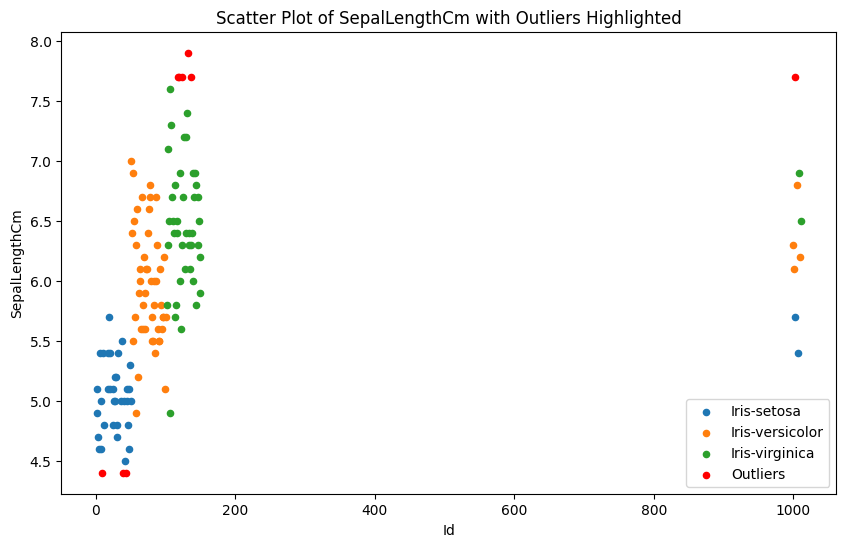

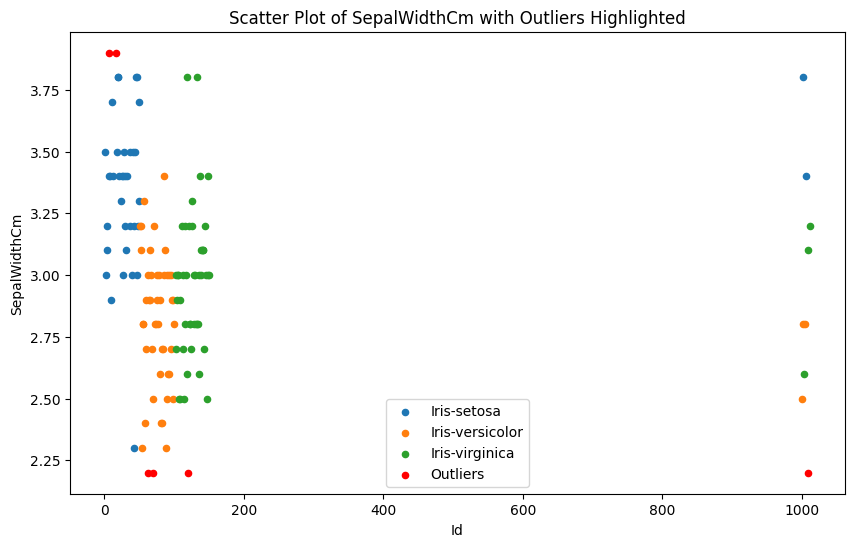

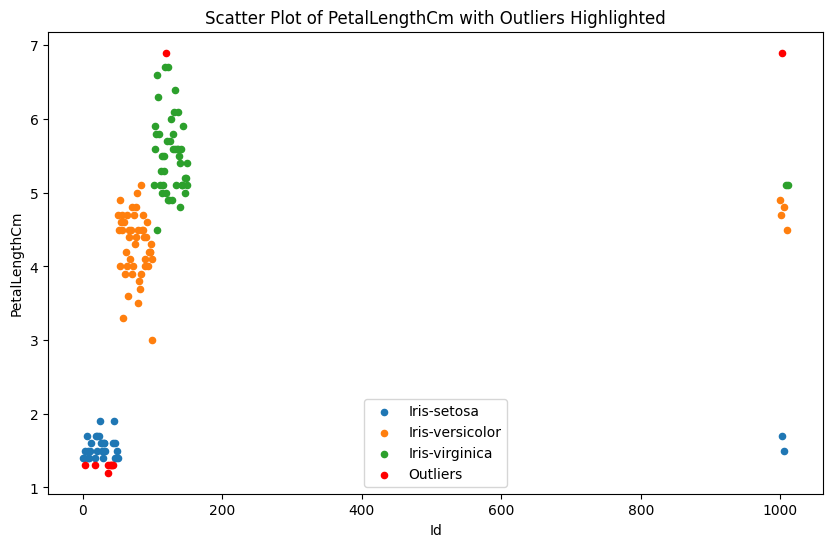

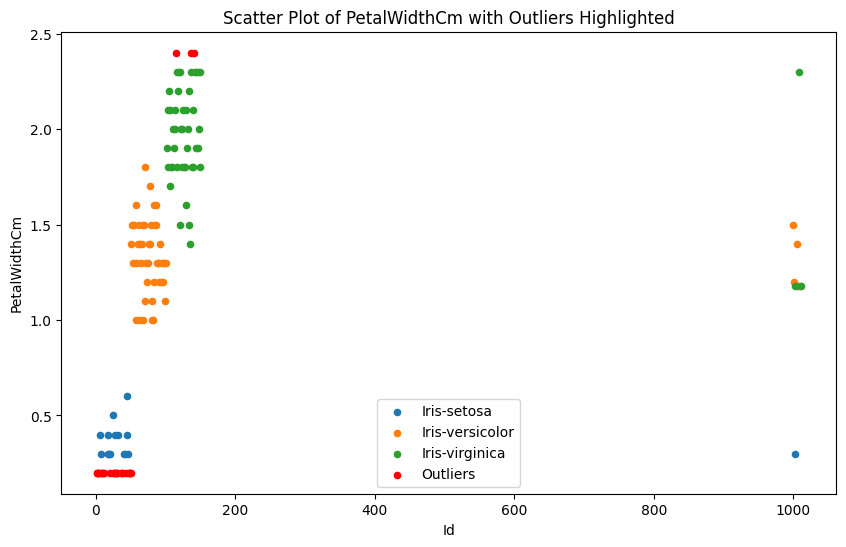

In [56]:
plot_outliers_with_species_dynamic_colors(cleaned_df, id_col='Id', group_col='Species', lower_percentile=0.01, upper_percentile=0.99)

In [57]:
print("原始資料行數：", len(no_Null_df))
print("移除極端值後的行數：", len(cleaned_df))

原始資料行數： 164
移除極端值後的行數： 139


In [58]:
cleaned_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,139.287770,5.939568,3.010072,3.961871,1.266331
std,232.254647,0.820094,0.390892,1.690099,0.708029
min,1.000000,4.400000,2.200000,1.200000,0.200000
25%,48.500000,5.400000,2.800000,1.700000,0.400000
50%,85.000000,5.900000,3.000000,4.500000,1.400000
75%,122.500000,6.500000,3.200000,5.100000,1.800000
max,1011.000000,7.900000,3.900000,6.900000,2.400000


In [59]:
tran={spiece:i for i,spiece in enumerate(set(cleaned_df["Species"]))}
tran_df=cleaned_df.copy()
tran_df["Species"]=tran_df["Species"].map(tran)


In [60]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 160
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             139 non-null    int64  
 1   SepalLengthCm  139 non-null    float64
 2   SepalWidthCm   139 non-null    float64
 3   PetalLengthCm  139 non-null    float64
 4   PetalWidthCm   139 non-null    float64
 5   Species        139 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.6 KB


In [61]:
tran_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,139.287770,5.939568,3.010072,3.961871,1.266331,1.014388
std,232.254647,0.820094,0.390892,1.690099,0.708029,0.851134
min,1.000000,4.400000,2.200000,1.200000,0.200000,0.000000
25%,48.500000,5.400000,2.800000,1.700000,0.400000,0.000000
50%,85.000000,5.900000,3.000000,4.500000,1.400000,1.000000
75%,122.500000,6.500000,3.200000,5.100000,1.800000,2.000000
max,1011.000000,7.900000,3.900000,6.900000,2.400000,2.000000


In [62]:
tran_df.to_csv("./new_iris.csv",index=False)
with open("tran.json","w") as f:
    json.dump(tran,f)